In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sb
sb.set_style('darkgrid')
sb.set()

step2 = "Sources/Fundraising Strategy - Step 2, 09.05.20.csv"
donation_data = pd.read_csv(step2)
donation_data = donation_data.iloc[:33,:]
donation_data

,Campaign Name,Bucket,Income FY21,In-Kind Donations FY21,Volunteer Hours FY21,Expenses FY21,Income FY20,In-Kind Donations FY20,Volunteer Hours FY20,Expenses FY20
0,Sponsor a Scholar,1: Individual Giving,"$15,127.99",$0.00,30,$0.00,"$25,213.95",$0.00,75.0,$0.00
1,Sponsor a Scholar - Fund a Thon,1: Individual Giving,"$2,520.00",$0.00,coming soon,$0.00,"$3,610.00",$3.50,20.0,$0.00
2,Appeal - June,1: Individual Giving,"$5,526.00",$0.00,27,$210.06,"$2,095.00",$341.23,20.0,$0.00
3,Appeal - December,1: Individual Giving,coming soon,$0.00,coming soon,$0.00,"$9,637.11",$459.55,20.0,$224.92
4,Online appeal - Giving Tuesday,1: Individual Giving,coming soon,$0.00,coming soon,$0.00,"$8,544.94","$1,499.08",36.0,$25.50
5,Online event - Starfish Search,1: Individual Giving,coming soon,$0.00,coming soon,$0.00,"$1,268.00",$7.50,50.0,$302.00
6,Online event - Starfish Bracket Challenge,1: Individual Giving,coming soon,$0.00,5,$175.00,"$1,115.00",$230.00,30.0,$0.00
7,Lapsed Donors,1: Individual Giving,coming soon,$0.00,coming soon,$0.00,$400.00,$0.00,8.0,$0.00
8,Benefit dinner tickets,1: Individual Giving,"$4,817.12",$384.79,538,$583.33,"$4,010.00",$540.13,300.0,"$1,000.00"
9,Benefit dinner individual donations,1: Individual Giving,"$8,250.40",$0.00,0,$583.33,"$2,825.00",$0.00,0.0,"$1,000.00"


# Data Import

In [2]:
x = donation_data.set_index(['Campaign Name'])

Campaigns_to_Analyze = x.loc[['Appeal - June', 'Online appeal - Giving Tuesday', 'Ecua vols/visitors', 'Benefit dinner item sales', 'Benefit dinner tickets', 'Benefit dinner individual donations', 'Benefit dinner auction', 'Benefit dinner sponsorships (5)', 'Benefit dinner sponsorships (1)']]

Campaigns_to_Analyze.replace(regex=['coming soon'], value='0', inplace=True)
Campaigns_to_Analyze = Campaigns_to_Analyze.rename(index={'Online appeal - Giving Tuesday': 'Appeal - Giving Tuesday','Benefit dinner item sales': 'BD item sales', 'Benefit dinner tickets': 'BD tickets', 'Benefit dinner individual donations': 'BD individual donations', 'Benefit dinner auction': 'BD auction', 'Benefit dinner sponsorships (5)': 'BD major donors', 'Benefit dinner sponsorships (1)': 'BD corporate sponsorship'})

Campaigns_to_Analyze

,Bucket,Income FY21,In-Kind Donations FY21,Volunteer Hours FY21,Expenses FY21,Income FY20,In-Kind Donations FY20,Volunteer Hours FY20,Expenses FY20
Campaign Name,,,,,,,,,
Appeal - June,1: Individual Giving,"$5,526.00",$0.00,27,$210.06,"$2,095.00",$341.23,20.0,$0.00
Appeal - Giving Tuesday,1: Individual Giving,0,$0.00,0,$0.00,"$8,544.94","$1,499.08",36.0,$25.50
Ecua vols/visitors,5: Earned Revenue,$0.00,$0.00,0,$0.00,"$5,487.46",$0.00,6.0,$25.00
BD item sales,5: Earned Revenue,$601.06,$704.94,11,$0.00,"$1,183.00",$159.60,10.0,$0.00
BD tickets,1: Individual Giving,"$4,817.12",$384.79,538,$583.33,"$4,010.00",$540.13,300.0,"$1,000.00"
BD individual donations,1: Individual Giving,"$8,250.40",$0.00,0,$583.33,"$2,825.00",$0.00,0.0,"$1,000.00"
BD auction,1: Individual Giving,"$9,808.13","$9,243.06",152,$803.34,"$11,491.00","$9,552.59",300.0,"$1,341.00"
BD major donors,2: Major Donors,"$50,000.00",$0.00,57,$0.00,"$87,500.00",$0.00,30.0,$0.00
BD corporate sponsorship,4: Corporations,$520.56,$0.00,1,$0.00,$500.00,$0.00,1.0,$0.00


# Data Cleaning

## Giving Tuesday FY20 (Copy)


In [3]:
Giving_Tuesday = Campaigns_to_Analyze.iloc[1:2,:]
Giving_Tuesday = Giving_Tuesday[['Expenses FY20', 'Income FY20', 'In-Kind Donations FY20', 'Volunteer Hours FY20']].replace('[\$,]', '', regex=True).astype(float)
Giving_Tuesday

,Expenses FY20,Income FY20,In-Kind Donations FY20,Volunteer Hours FY20
Campaign Name,,,,
Appeal - Giving Tuesday,25.5,8544.94,1499.08,36.0


## Ecuador Volunteers FY20

In [4]:
Ecua_vols = Campaigns_to_Analyze.iloc[2:3,:]

Ecua_vols = Ecua_vols[['Expenses FY20', 'Income FY20', 'In-Kind Donations FY20', 'Volunteer Hours FY20']]
Ecua_vols = Ecua_vols.replace('[\$,]', '', regex=True).astype(float)
Ecua_vols

,Expenses FY20,Income FY20,In-Kind Donations FY20,Volunteer Hours FY20
Campaign Name,,,,
Ecua vols/visitors,25.0,5487.46,0.0,6.0


## Benefit Dinner FY20

In [5]:
# BD_20['Expenses FY20'] = 1

In [6]:
BD_20 = Campaigns_to_Analyze.iloc[3:,:]
BD_20 = BD_20[['Expenses FY20', 'Income FY20', 'In-Kind Donations FY20', 'Volunteer Hours FY20']].replace('[\$,]', '', regex=True).astype(float)
BD_20.loc['Benefit Dinner Totals'] = BD_20.sum()
BD_20

,Expenses FY20,Income FY20,In-Kind Donations FY20,Volunteer Hours FY20
Campaign Name,,,,
BD item sales,0.0,1183.0,159.60,10.0
BD tickets,1000.0,4010.0,540.13,300.0
BD individual donations,1000.0,2825.0,0.00,0.0
BD auction,1341.0,11491.0,9552.59,300.0
BD major donors,0.0,87500.0,0.00,30.0
BD corporate sponsorship,0.0,500.0,0.00,1.0
Benefit Dinner Totals,3341.0,107509.0,10252.32,641.0


In [45]:
BD_20_Totals = BD_20.iloc[6:,:]
BD_20_Totals

,Expenses FY20,Income FY20,In-Kind Donations FY20,Volunteer Hours FY20
Campaign Name,,,,
Benefit Dinner Totals,3341.0,107509.0,10252.32,641.0


## June Appeal FY21

In [7]:
June_Appeal = Campaigns_to_Analyze.iloc[0:1,:]
# June_Appeal = June_Appeal[June_Appeal.columns[0:8]].replace('[\$,]', '', regex=True).astype(float)
June_Appeal = June_Appeal[['Expenses FY21', 'Income FY21', 'In-Kind Donations FY21', 'Volunteer Hours FY21']].replace('[\$,]', '', regex=True).astype(float)
June_Appeal

,Expenses FY21,Income FY21,In-Kind Donations FY21,Volunteer Hours FY21
Campaign Name,,,,
Appeal - June,210.06,5526.0,0.0,27.0


## Benefit Dinner Item Sales FY21

In [16]:
Dinner_item_sales = Campaigns_to_Analyze.iloc[3:4,:]
Dinner_item_sales = Dinner_item_sales[['Income FY21', 'In-Kind Donations FY21', 'Volunteer Hours FY21']].replace('[\$,]', '', regex=True).astype(float)
Dinner_item_sales['Expenses FY21'] = 1
Dinner_item_sales = Dinner_item_sales[['Expenses FY21', 'Income FY21', 'In-Kind Donations FY21', 'Volunteer Hours FY21']].replace('[\$,]', '', regex=True).astype(float)
Dinner_item_sales

,Expenses FY21,Income FY21,In-Kind Donations FY21,Volunteer Hours FY21
Campaign Name,,,,
BD item sales,1.0,601.06,704.94,11.0


## Other Dinner Line Items, FY21

In [37]:
BD_Income = Campaigns_to_Analyze.iloc[3:,:]
BD_21 = BD_Income[['Expenses FY21', 'Income FY21', 'In-Kind Donations FY21', 'Volunteer Hours FY21']].replace('[\$,]', '', regex=True).astype(float)
BD_21.loc['Benefit Dinner Totals'] = BD_21.sum()
BD_21

,Expenses FY21,Income FY21,In-Kind Donations FY21,Volunteer Hours FY21
Campaign Name,,,,
BD item sales,0.00,601.06,704.94,11.0
BD tickets,583.33,4817.12,384.79,538.0
BD individual donations,583.33,8250.40,0.00,0.0
BD auction,803.34,9808.13,9243.06,152.0
BD major donors,0.00,50000.00,0.00,57.0
BD corporate sponsorship,0.00,520.56,0.00,1.0
Benefit Dinner Totals,1970.00,73997.27,10332.79,759.0


In [38]:
BD_Income = BD_21.iloc[6:,:]
BD_Income

,Expenses FY21,Income FY21,In-Kind Donations FY21,Volunteer Hours FY21
Campaign Name,,,,
Benefit Dinner Totals,1970.0,73997.27,10332.79,759.0


# ANALYSIS: FY21

In [39]:
x = [June_Appeal, BD_Income]
FY21_Campaigns = pd.concat(x)
FY21_Campaigns['Return_per_Dollar'] = FY21_Campaigns['Income FY21']/FY21_Campaigns['Expenses FY21']
FY21_Campaigns['Return_per_Hour'] = FY21_Campaigns['Income FY21']/FY21_Campaigns['Volunteer Hours FY21']

FY21_Campaigns.to_csv("./ExcelOutputs/FY21_Campaigns.csv", encoding="utf-8", index=True)
FY21_Campaigns

,Expenses FY21,Income FY21,In-Kind Donations FY21,Volunteer Hours FY21,Return_per_Dollar,Return_per_Hour
Campaign Name,,,,,,
Appeal - June,210.06,5526.00,0.00,27.0,26.306769,204.666667
Benefit Dinner Totals,1970.00,73997.27,10332.79,759.0,37.562066,97.493109


## ANALYSIS: Return per Dollar Spent

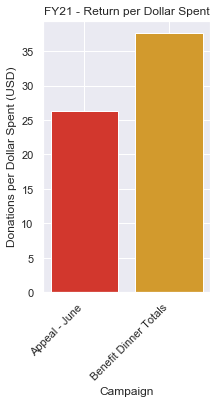

In [65]:
return_per_dollar = FY21_Campaigns['Return_per_Dollar']
campaign = FY21_Campaigns.index

plt.figure(figsize=(3,5))
plt.bar(campaign, return_per_dollar, color=sb.hls_palette(10, l=.5))
plt.title("FY21 - Return per Dollar Spent")
plt.xlabel("Campaign")
plt.ylabel("Donations per Dollar Spent (USD)")
plt.xticks(rotation=45, ha='right')

# plt.savefig("./Images/FY21 - Return per Dollar Spent.png")
plt.show()

## ANALYSIS: Return per Hour Volunteered

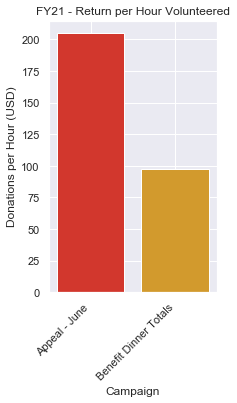

In [66]:
return_per_hour = FY21_Campaigns['Return_per_Hour']
campaign = FY21_Campaigns.index

plt.figure(figsize=(3,5))
plt.bar(campaign, return_per_hour, color=sb.hls_palette(10, l=.5))
plt.title("FY21 - Return per Hour Volunteered")
plt.xlabel("Campaign")
plt.ylabel("Donations per Hour (USD)")
plt.xticks(rotation=45, ha='right')

# plt.savefig("./Images/FY21 - Return per Volunteer Hour.png")
plt.show()

# ANALYSIS: FY20

In [46]:
y = [Giving_Tuesday, BD_20_Totals, Ecua_vols]
FY20_Campaigns = pd.concat(y)
FY20_Campaigns['Return_per_Dollar'] = FY20_Campaigns['Income FY20']/FY20_Campaigns['Expenses FY20']
FY20_Campaigns['Return_per_Hour'] = FY20_Campaigns['Income FY20']/FY20_Campaigns['Volunteer Hours FY20']
FY20_Campaigns.to_csv("./ExcelOutputs/FY20_Campaigns.csv", encoding="utf-8", index=True)
FY20_Campaigns

,Expenses FY20,Income FY20,In-Kind Donations FY20,Volunteer Hours FY20,Return_per_Dollar,Return_per_Hour
Campaign Name,,,,,,
Appeal - Giving Tuesday,25.5,8544.94,1499.08,36.0,335.095686,237.359444
Benefit Dinner Totals,3341.0,107509.00,10252.32,641.0,32.178689,167.720749
Ecua vols/visitors,25.0,5487.46,0.00,6.0,219.498400,914.576667


## ANALYSIS: Return per Dollar Spent

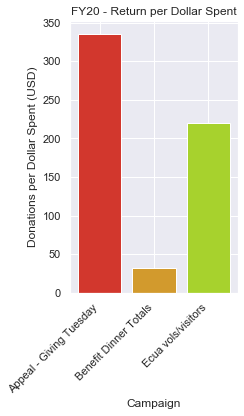

In [68]:
return_per_dollar2 = FY20_Campaigns['Return_per_Dollar']
campaign2 = FY20_Campaigns.index

plt.figure(figsize=(3,5))
plt.bar(campaign2, return_per_dollar2, color=sb.hls_palette(10, l=.5))
plt.title("FY20 - Return per Dollar Spent")
plt.xlabel("Campaign")
plt.ylabel("Donations per Dollar Spent (USD)")
plt.xticks(rotation=45, ha='right')

# plt.savefig("./Images/FY20 - Return per Dollar Spent.png")
plt.show()

## ANALYSIS: Return per Hour Volunteered

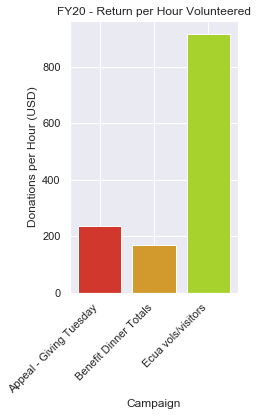

In [69]:
return_per_hour2 = FY20_Campaigns['Return_per_Hour']
campaign2 = FY20_Campaigns.index

plt.figure(figsize=(3,5))
plt.bar(campaign2, return_per_hour2, color=sb.hls_palette(10, l=.5))
plt.title("FY20 - Return per Hour Volunteered")
plt.xlabel("Campaign")
plt.ylabel("Donations per Hour (USD)")
plt.xticks(rotation=45, ha='right')

# plt.savefig("./Images/FY20 - Return per Volunteer Hour.png")
plt.show()

# Dinner Analysis by component

In [50]:
All_Dinner = Campaigns_to_Analyze.iloc[3:,:]
All_Dinner = All_Dinner[['Income FY21', 'Income FY20']].replace('[\$,]', '', regex=True).astype(float)
All_Dinner

,Income FY21,Income FY20
Campaign Name,,
BD item sales,601.06,1183.0
BD tickets,4817.12,4010.0
BD individual donations,8250.40,2825.0
BD auction,9808.13,11491.0
BD major donors,50000.00,87500.0
BD corporate sponsorship,520.56,500.0


In [51]:
BD_item_sales = All_Dinner.iloc[0]
BD_tickets = All_Dinner.iloc[1]
BD_indiv_don = All_Dinner.iloc[2]
BD_auction = All_Dinner.iloc[3]
BD_MD = All_Dinner.iloc[4]
BD_corp_spon = All_Dinner.iloc[5]

In [52]:
xticks = All_Dinner.columns
index = All_Dinner.index
index

Index(['BD item sales', 'BD tickets', 'BD individual donations', 'BD auction',
       'BD major donors', 'BD corporate sponsorship'],
      dtype='object', name='Campaign Name')

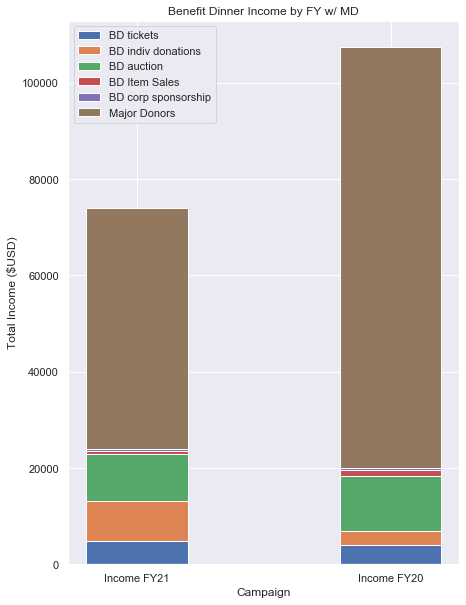

In [76]:
plt.figure(figsize=(7,10))

plt.bar(x=xticks, height=BD_tickets, width=0.4)
plt.bar(x=xticks, height=BD_indiv_don, width=0.4, bottom=BD_tickets)
plt.bar(x=xticks, height=BD_auction, width=0.4, bottom=BD_indiv_don+BD_tickets)
plt.bar(x=xticks, height=BD_item_sales, width=0.4, bottom=BD_auction+BD_indiv_don+BD_tickets)
plt.bar(x=xticks, height=BD_corp_spon, width=0.4, bottom=BD_item_sales+BD_auction+BD_indiv_don+BD_tickets)
plt.bar(x=xticks, height=BD_MD, width=0.4, bottom=BD_corp_spon+BD_item_sales+BD_auction+BD_indiv_don+BD_tickets)

Legend = ['BD tickets', 'BD indiv donations', 'BD auction', 'BD Item Sales', 'BD corp sponsorship', 'Major Donors']
plt.xlabel('Campaign')
plt.ylabel('Total Income ($USD)')
plt.title('Benefit Dinner Income by FY w/ MD')
plt.legend(Legend,loc=2)

plt.savefig("./Images/Benefit Dinner Income - FY21vFY20, with MD.png")
plt.show()

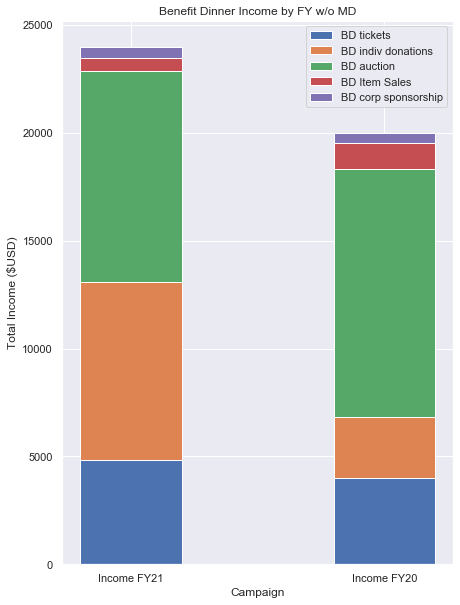

In [75]:
plt.figure(figsize=(7,10))

xticks = All_Dinner.columns

plt.bar(x=xticks, height=BD_tickets, width=0.4)
plt.bar(x=xticks, height=BD_indiv_don, width=0.4, bottom=BD_tickets)
plt.bar(x=xticks, height=BD_auction, width=0.4, bottom=BD_indiv_don+BD_tickets)
plt.bar(x=xticks, height=BD_item_sales, width=0.4, bottom=BD_auction+BD_indiv_don+BD_tickets)
plt.bar(x=xticks, height=BD_corp_spon, width=0.4, bottom=BD_item_sales+BD_auction+BD_indiv_don+BD_tickets)
# plt.bar(x=xticks, height=BD_MD, width=0.4, bottom=BD_corp_spon+BD_item_sales+BD_auction+BD_indiv_don+BD_tickets)


Legend = ['BD tickets', 'BD indiv donations', 'BD auction', 'BD Item Sales', 'BD corp sponsorship']
plt.xlabel('Campaign')
plt.ylabel('Total Income ($USD)')
plt.title('Benefit Dinner Income by FY w/o MD')
plt.legend(Legend,loc=1)

plt.savefig("./Images/Benefit Dinner Income - FY21vFY20, no MD.png")
plt.show()

In [60]:
test = Campaigns_to_Analyze[['Income FY21']]
test['June Appeal FY21'] = test['Income FY21']
test = test.rename(columns={"Income FY21": "Benefit Dinner FY21"})
test = test.drop(['Appeal - Giving Tuesday', 'Ecua vols/visitors'])
# test = test[['Benefit Dinner FY21', 'June Appeal FY21']].replace('[\$,]', '', regex=True).astype(float)
test

C:\Users\Purvi Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Benefit Dinner FY21,June Appeal FY21
Campaign Name,,
Appeal - June,"$5,526.00","$5,526.00"
BD item sales,$601.06,$601.06
BD tickets,"$4,817.12","$4,817.12"
BD individual donations,"$8,250.40","$8,250.40"
BD auction,"$9,808.13","$9,808.13"
BD major donors,"$50,000.00","$50,000.00"
BD corporate sponsorship,$520.56,$520.56


In [61]:
test.loc['Appeal - June','Benefit Dinner FY21'] = 0
test.loc[['BD item sales', 'BD tickets', 'BD individual donations', 'BD auction', 'BD major donors', 'BD corporate sponsorship'],'June Appeal FY21'] = 0
test = test[['Benefit Dinner FY21', 'June Appeal FY21']].replace('[\$,]', '', regex=True).astype(float)
test

,Benefit Dinner FY21,June Appeal FY21
Campaign Name,,
Appeal - June,0.00,5526.0
BD item sales,601.06,0.0
BD tickets,4817.12,0.0
BD individual donations,8250.40,0.0
BD auction,9808.13,0.0
BD major donors,50000.00,0.0
BD corporate sponsorship,520.56,0.0


In [62]:
June_AppealFY21 = test.iloc[0]
BD_item_salesFY21 = test.iloc[1]
BD_ticketsFY21 = test.iloc[2]
BD_indiv_donFY21 = test.iloc[3]
BD_auctionFY21 = test.iloc[4]
BD_MDFY21 = test.iloc[5]
BD_corp_sponFY21 = test.iloc[6]

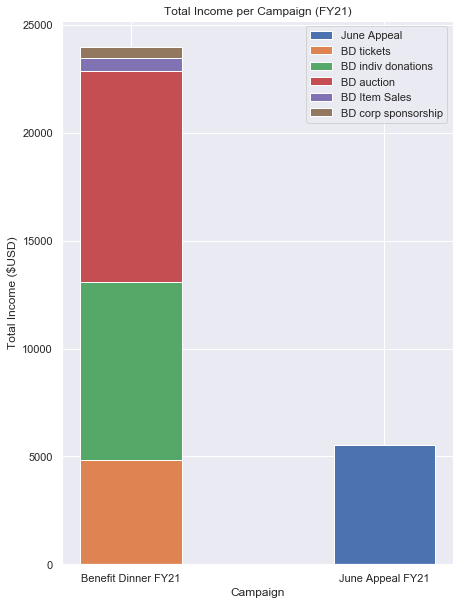

In [74]:
plt.figure(figsize=(7,10))

xticks2 = test.columns

plt.bar(x=xticks2, height=June_AppealFY21, width=0.4)
plt.bar(x=xticks2, height=BD_ticketsFY21, width=0.4, bottom=June_AppealFY21)
plt.bar(x=xticks2, height=BD_indiv_donFY21, width=0.4, bottom=BD_ticketsFY21)
plt.bar(x=xticks2, height=BD_auctionFY21, width=0.4, bottom=BD_indiv_donFY21+BD_ticketsFY21+June_AppealFY21)
plt.bar(x=xticks2, height=BD_item_salesFY21, width=0.4, bottom=BD_auctionFY21+BD_indiv_donFY21+BD_ticketsFY21+June_AppealFY21)
plt.bar(x=xticks2, height=BD_corp_sponFY21, width=0.4, bottom=BD_item_salesFY21+BD_auctionFY21+BD_indiv_donFY21+BD_ticketsFY21+June_AppealFY21)
# plt.bar(x=xticks, height=BD_MDFY21, width=0.4, bottom=BD_corp_sponFY21+BD_item_salesFY21+BD_auctionFY21+BD_indiv_donFY21+BD_ticketsFY21+June_AppealFY21)


Legend = ['June Appeal', 'BD tickets', 'BD indiv donations', 'BD auction', 'BD Item Sales', 'BD corp sponsorship']
plt.xlabel('Campaign')
plt.ylabel('Total Income ($USD)')
plt.title('Total Income per Campaign (FY21)')
plt.legend(Legend,loc=1)

plt.savefig("./Images/FY21 - Total Income by Campaign.png")
plt.show()